# Project - Hospitality App New User Bookings- Zhang Qi

### Objective

1. You need to do basic feature engineering, data preprocessing, modelling and model tuning work in this homework.

2. Please **focus more on feature extractions**. In this project, there are a lot of interesting features, how to fully utilize them is the key to get a good model.


### Hints
1. Data Exploration
2. Data Processing
3. Feature Engineering
4. Model Building
5. Model Evaluation

In [86]:

import numpy as np
import pandas as pd
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [89]:
pro_6_train = pd.read_csv('/Users/qi/Desktop/DS /camp/Project 6/train_users_2.csv')
pro_6_test = pd.read_csv('/Users/qi/Desktop/DS /camp/Project 6/test_users.csv')

In [90]:
!head 'train_users_2.csv'

id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
gxn3p5htnn,2010-06-28,20090319043255,,-unknown-,,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,

In [6]:
!head 'test_users.csv'

id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
5uwns89zht,2014-07-01,20140701000006,,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,20140701000051,,-unknown-,,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,20140701000148,,-unknown-,,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,20140701000215,,-unknown-,,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,20140701000305,,-unknown-,,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
szx28ujmhf,2014-07-01,20140701000336,,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
guenkfjcbq,2014-07-01,20140701000514,,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
tkpq0mlugk,2014-07-01,201

In [7]:
!wc -l  'train_users_2.csv'

  213452 train_users_2.csv


In [8]:
!wc -l  'test_users.csv'

   62097 test_users.csv


In [9]:
print(pro_6_train.shape)
print(pro_6_test.shape)

(213451, 16)
(62096, 15)


In [10]:
pro_6 = pd.concat([pro_6_train, pro_6_test]).reset_index(drop = True)

In [11]:
print(pro_6.shape)
print(pro_6.columns)

(275547, 16)
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [12]:
train_size = pro_6_train.shape[0]
train_size

213451

In [13]:
pro_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   275547 non-null  object 
 5   age                      158681 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  269462 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

Dataset description

o	id: user id <br /> 
o	date_account_created: the date of account creation <br /> 
o	timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up <br /> 
o	date_first_booking: date of first booking <br /> 
o	gender <br /> 
o	age <br /> 
o	signup_method <br /> 
o	signup_flow: the page a user came to signup up from <br /> 
o	language: international language preference <br /> 
o	affiliate_channel: what kind of paid marketing <br /> 
o	affiliate_provider: where the marketing is e.g. google, craigslist, other <br /> 
o	first_affiliate_tracked: whats the first marketing the user interacted with before the signing up <br /> 
o	signup_app <br /> 
o	first_device_type <br /> 
o	first_browser <br /> 
o	country_destination: this is the target variable we will predict <br /> 

## 1. Data Exploration

In [14]:
pro_6.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## 2. EDA

#### Uni-variate analysis

<AxesSubplot:>

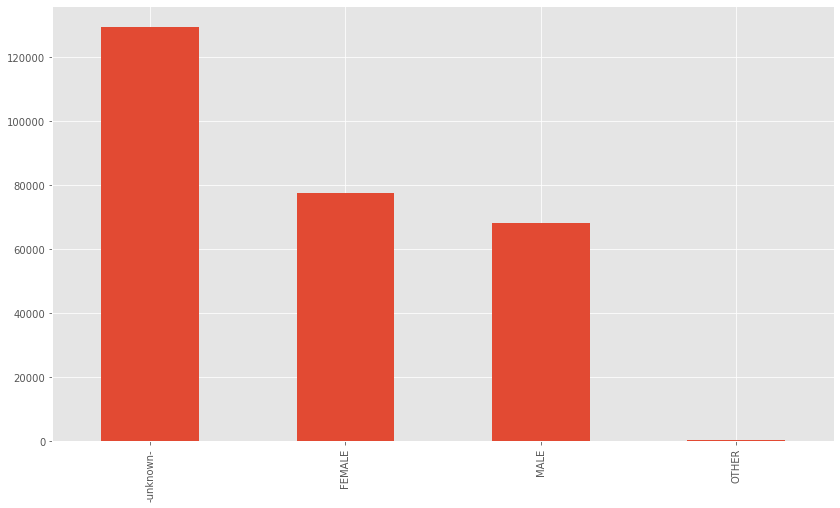

In [15]:
# explore the gender data
plt.figure(figsize=[14,8])
pro_6.gender.value_counts().plot.bar()

<AxesSubplot:>

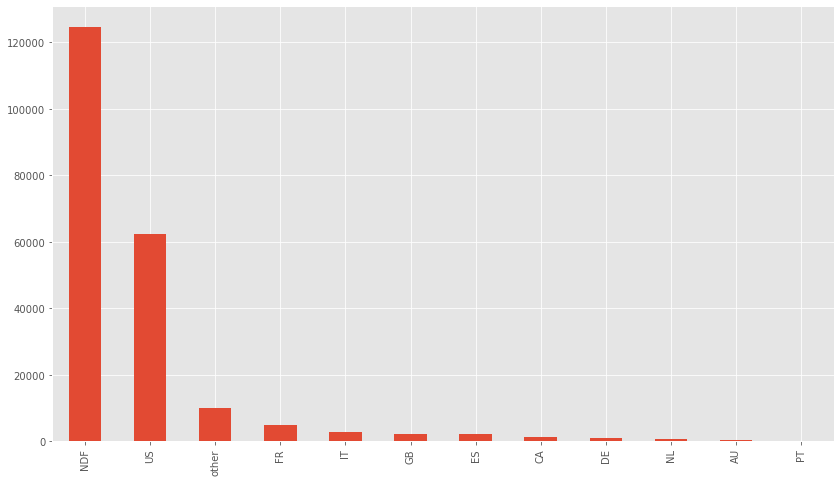

In [16]:
# see the distribution of destination
plt.figure(figsize=[14,8])
pro_6.country_destination.value_counts().plot.bar()

<AxesSubplot:>

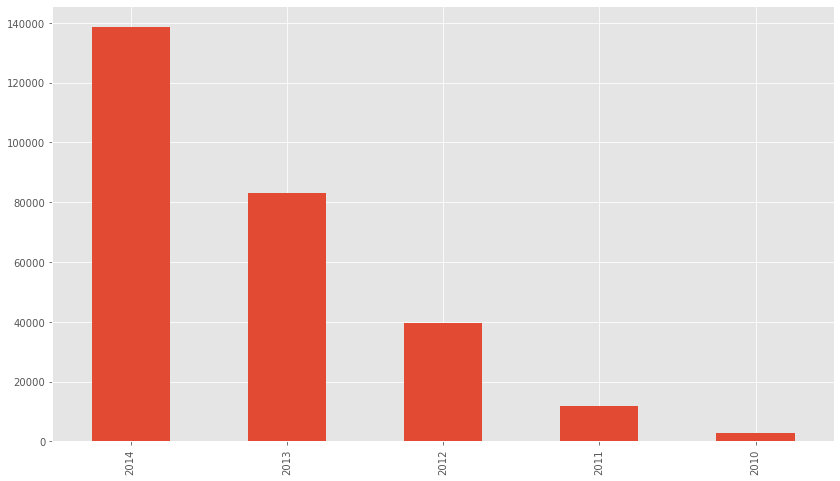

In [17]:
# explore date account created
plt.figure(figsize=[14,8])
pd.to_datetime(pro_6.date_account_created).dt.year.value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

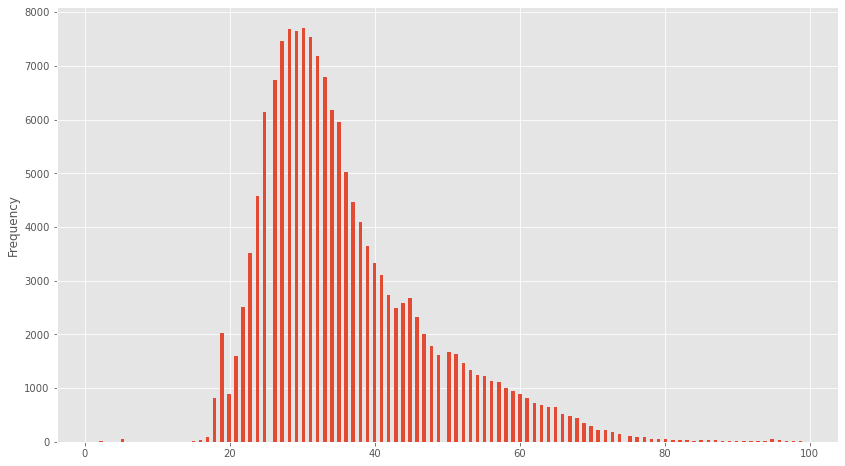

In [18]:
# see the age distribution
plt.figure(figsize=[14,8])
pro_6.loc[pro_6.age < 100].age.plot.hist(bins = 200)

### Bi-variate analysis

Text(0.5, 1.0, 'Gender-Age Distribution')

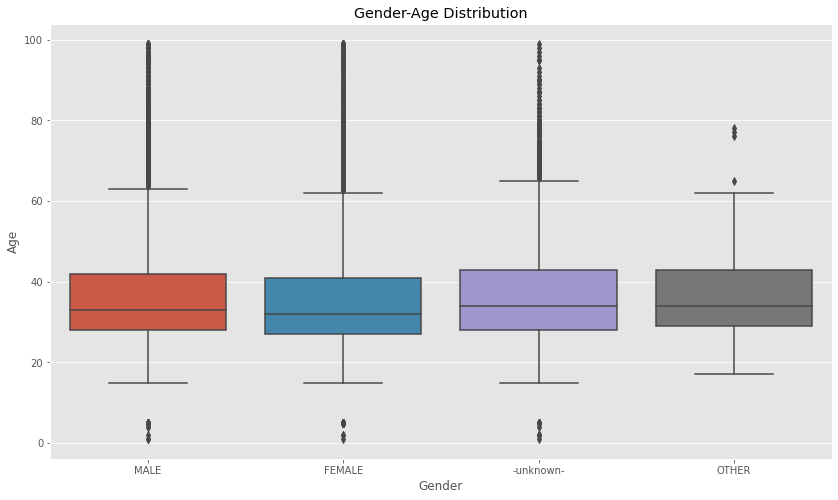

In [19]:
# Gender-Age Distribution plot

plt.figure(figsize=[14,8])
sns.boxplot(data=pro_6[pro_6.age < 100],y='age',x='gender')
# plt.ylim(18,100)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Gender-Age Distribution')

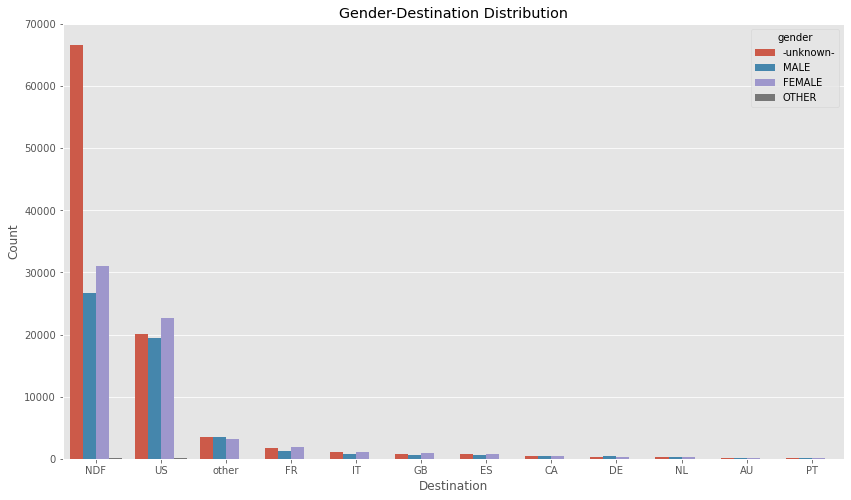

In [20]:
# Gender-Destination Distribution Plot

plt.figure(figsize=(14,8))
order1 = pro_6['country_destination'].value_counts().index
sns.countplot(data = pro_6, x = 'country_destination', order = order1,hue='gender')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Gender-Destination Distribution')
order2 = pro_6['country_destination'].value_counts()

## 3. Feature Engineering

In [21]:
# The label we need to predict
labels = pro_6['country_destination'].values

# drop the id column
# drop the date_first_booking because when we predict for new user, they don't have booking info
# drop the label in training set
pro_6.drop(['id', 'country_destination', 'date_first_booking'], axis = 1, inplace = True)

#### date_account_created （dac）

In [22]:
# create year, month, day feature for dac
dac = pd.to_datetime(pro_6.date_account_created)
pro_6['dac_year'] = np.array([x.year for x in dac])
pro_6['dac_month'] = np.array([x.month for x in dac])
pro_6['dac_day'] = np.array([x.day for x in dac])

In [23]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",200)
# create features of weekday for day, showing Monday to Sunday
pro_6['dac_wd'] = np.array([x.isoweekday() for x in dac])
df_dac_wd = pd.get_dummies(pro_6.dac_wd, prefix = 'dac_wd')
pro_6 = pd.concat((pro_6, df_dac_wd), axis = 1)
pro_6.drop(['dac_wd'], axis = 1, inplace = True)
pro_6.head(5)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,dac_wd_1,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,1,0,0,0,0,0,0
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,0,0,1,0,0,0,0
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,0,1,0,0,0,0,0
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,1,0,0,0,0,0,0
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,0,1,0,0,0,0,0


In [24]:
# Define functiton to generate season data
def get_season(dt):
    dt = dt.date()
    # dt must be a datetime type
    if dt.month in [3,4,5]:
        return 'Spring'    
    elif dt.month in [6,7,8]:
        return 'Summer'    
    elif dt.month in [9,10,11]:
        return 'Fall'   
    else:
        return 'Winter' 

In [25]:
# create season features from dac
pro_6['dac_season'] = np.array([get_season(x) for x in dac])
df_dac_season = pd.get_dummies(pro_6.dac_season, prefix = 'dac_season')
pro_6 = pd.concat((pro_6, df_dac_season), axis = 1)
pro_6.drop(['dac_season'], axis = 1, inplace = True)
pro_6.head(5)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,dac_wd_1,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7,dac_season_Fall,dac_season_Spring,dac_season_Summer,dac_season_Winter
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,1,0,0,0,0,0,0,0,0,1,0
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,0,0,1,0,0,0,0,0,1,0,0
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,0,1,0,0,0,0,0,1,0,0,0
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,1,0,0,0,0,0,0,0,0,0,1
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,0,1,0,0,0,0,0,1,0,0,0


#### timestamp_first_active (tfa)

Sample data format 20090319043255

In [27]:
tfa = pro_6.timestamp_first_active.astype(str).apply(lambda x: datetime.datetime(int(x[:4]),
                                                                          int(x[4:6]), 
                                                                          int(x[6:8]),
                                                                          int(x[8:10]),
                                                                          int(x[10:12]),
                                                                          int(x[12:])))

In [28]:
tfa

0        2009-03-19 04:32:55
1        2009-05-23 17:48:09
2        2009-06-09 23:12:47
3        2009-10-31 06:01:29
4        2009-12-08 06:11:05
                 ...        
275542   2014-09-30 23:52:32
275543   2014-09-30 23:53:06
275544   2014-09-30 23:54:08
275545   2014-09-30 23:54:30
275546   2014-09-30 23:59:01
Name: timestamp_first_active, Length: 275547, dtype: datetime64[ns]

In [29]:
# create tfa_year, tfa_month, tfa_day feature
pro_6['tfa_year'] = np.array([x.year for x in tfa])
pro_6['tfa_month'] = np.array([x.month for x in tfa])
pro_6['tfa_day'] = np.array([x.day for x in tfa])

In [30]:
# create features of weekday
pro_6['tfa_wd'] = np.array([x.isoweekday() for x in tfa])
df_tfa_wd = pd.get_dummies(pro_6.tfa_wd, prefix = 'tfa_wd')
pro_6 = pd.concat((pro_6, df_tfa_wd), axis = 1)
pro_6.drop(['tfa_wd'], axis = 1, inplace = True)

In [31]:
# create season features from tfa
pro_6['tfa_season'] = np.array([get_season(x) for x in tfa])
df_tfa_season = pd.get_dummies(pro_6.tfa_season, prefix = 'tfa_season')
pro_6 = pd.concat((pro_6, df_tfa_season), axis = 1)
pro_6.drop(['tfa_season'], axis = 1, inplace = True)

#### Time span between dac and tfa can also be used as a feature. 

In [32]:
dt_span = (dac - tfa).dt.seconds
pro_6['dt_span'] = np.array([x for x in dt_span])

### Deal with Age

In [116]:
age = pro_6['age']
age.fillna(999, inplace = True)

In [117]:
age.describe()

count    275547.000000
mean        450.849398
std         482.707529
min           1.000000
25%          32.000000
50%          51.000000
75%         999.000000
max        2014.000000
Name: age, dtype: float64

In [108]:
age[age > 120].value_counts()

999.0     116866
2014.0       710
2013.0        39
1928.0         6
1927.0         6
2001.0         5
1931.0         4
1925.0         3
1934.0         3
1924.0         3
1947.0         3
1949.0         3
1935.0         3
1932.0         3
1933.0         3
1929.0         2
1940.0         2
1944.0         2
1926.0         2
1938.0         2
1936.0         2
1951.0         2
1920.0         2
1923.0         2
2000.0         1
1939.0         1
1968.0         1
1948.0         1
1930.0         1
2002.0         1
1952.0         1
1922.0         1
1945.0         1
1954.0         1
150.0          1
1937.0         1
2008.0         1
1995.0         1
1942.0         1
1953.0         1
132.0          1
1941.0         1
Name: age, dtype: int64

<AxesSubplot:ylabel='Frequency'>

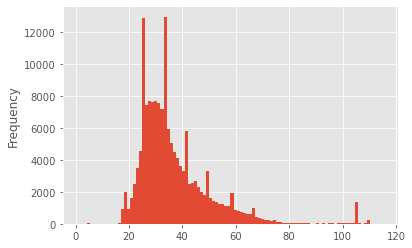

In [121]:
age[age <= 120].plot.hist(bins=100)

In [122]:
# 1920 < age < 2010 - We assume this range as birth year
# so we do 2020 - age as the age 
age = np.where(np.logical_and(age<2010, age>1920), 2020-age, age)
# 2010 < age < 2020 - We assume this range as invalid since it's too young to book
age = np.where(np.logical_and(age<2020, age>2010), 999, age) 

In [123]:
age.plot.hist

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

## Label Encoding and One Hot Encoding

In [38]:
pd.set_option('display.max_columns', None) 
pro_6

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,dac_wd_1,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7,dac_season_Fall,dac_season_Spring,dac_season_Summer,dac_season_Winter,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,tfa_season_Fall,tfa_season_Spring,tfa_season_Summer,tfa_season_Winter,dt_span
0,2010-06-28,20090319043255,-unknown-,999.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,1,0,0,0,0,0,0,0,0,1,0,2009,3,19,0,0,0,1,0,0,0,0,1,0,0,70025
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,0,0,1,0,0,0,0,0,1,0,0,2009,5,23,0,0,0,0,0,1,0,0,1,0,0,22311
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,0,1,0,0,0,0,0,1,0,0,0,2009,6,9,0,1,0,0,0,0,0,0,0,1,0,2833
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,1,0,0,0,0,0,0,0,0,0,1,2009,10,31,0,0,0,0,0,1,0,1,0,0,0,64711
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,0,1,0,0,0,0,0,1,0,0,0,2009,12,8,0,1,0,0,0,0,0,0,0,0,1,64135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,2014-09-30,20140930235232,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2014,9,30,0,1,0,0,0,0,0,1,0,0,0,2014,9,30,0,1,0,0,0,0,0,1,0,0,0,448
275543,2014-09-30,20140930235306,-unknown-,999.0,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2014,9,30,0,1,0,0,0,0,0,1,0,0,0,2014,9,30,0,1,0,0,0,0,0,1,0,0,0,414
275544,2014-09-30,20140930235408,-unknown-,999.0,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2014,9,30,0,1,0,0,0,0,0,1,0,0,0,2014,9,30,0,1,0,0,0,0,0,1,0,0,0,352
275545,2014-09-30,20140930235430,-unknown-,999.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014,9,30,0,1,0,0,0,0,0,1,0,0,0,2014,9,30,0,1,0,0,0,0,0,1,0,0,0,330


In [39]:
feature_OHE = ['gender', 
               'signup_method', 
               'signup_flow', 
               'language', 
               'affiliate_channel', 
               'affiliate_provider', 
               'first_affiliate_tracked', 
               'signup_app', 
               'first_device_type', 
               'first_browser']

**Label Encoding:**<br/>
* Prerequisite for One-Hot-Encoding.
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html<br/>

In [40]:
from sklearn import preprocessing
LBL = preprocessing.LabelEncoder()

LE_vars=[]
LE_map=dict()
LE_map1=dict()
for cat_var in feature_OHE:
    print ("Label Encoding %s" % (cat_var))
    LE_var=cat_var+'_le'
    pro_6[LE_var]=LBL.fit_transform(pro_6[cat_var].fillna('none'))
    LE_vars.append(LE_var)
    LE_map1[cat_var]=dict(zip(LBL.classes_, LBL.transform(LBL.classes_))) ## Here you generate the mapping dictionary
    LE_map[cat_var]=LBL.classes_
print ("Label-encoded feaures: %s" % (LE_vars))

Label Encoding gender
Label Encoding signup_method
Label Encoding signup_flow
Label Encoding language
Label Encoding affiliate_channel
Label Encoding affiliate_provider
Label Encoding first_affiliate_tracked
Label Encoding signup_app
Label Encoding first_device_type
Label Encoding first_browser
Label-encoded feaures: ['gender_le', 'signup_method_le', 'signup_flow_le', 'language_le', 'affiliate_channel_le', 'affiliate_provider_le', 'first_affiliate_tracked_le', 'signup_app_le', 'first_device_type_le', 'first_browser_le']


In [41]:
LE_map1

{'gender': {'-unknown-': 0, 'FEMALE': 1, 'MALE': 2, 'OTHER': 3},
 'signup_method': {'basic': 0, 'facebook': 1, 'google': 2, 'weibo': 3},
 'signup_flow': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  8: 7,
  10: 8,
  12: 9,
  14: 10,
  15: 11,
  16: 12,
  20: 13,
  21: 14,
  23: 15,
  24: 16,
  25: 17},
 'language': {'-unknown-': 0,
  'ca': 1,
  'cs': 2,
  'da': 3,
  'de': 4,
  'el': 5,
  'en': 6,
  'es': 7,
  'fi': 8,
  'fr': 9,
  'hr': 10,
  'hu': 11,
  'id': 12,
  'is': 13,
  'it': 14,
  'ja': 15,
  'ko': 16,
  'nl': 17,
  'no': 18,
  'pl': 19,
  'pt': 20,
  'ru': 21,
  'sv': 22,
  'th': 23,
  'tr': 24,
  'zh': 25},
 'affiliate_channel': {'api': 0,
  'content': 1,
  'direct': 2,
  'other': 3,
  'remarketing': 4,
  'sem-brand': 5,
  'sem-non-brand': 6,
  'seo': 7},
 'affiliate_provider': {'baidu': 0,
  'bing': 1,
  'craigslist': 2,
  'daum': 3,
  'direct': 4,
  'email-marketing': 5,
  'facebook': 6,
  'facebook-open-graph': 7,
  'google': 8,
  'gsp': 9,
  'meetup': 10,
  'n

**One Hot Encoding:**<br/>
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html<br/>

In [42]:
OHE = preprocessing.OneHotEncoder(sparse=False)
start=time.time()
OHE.fit(pro_6[LE_vars])
OHE_data=OHE.transform(pro_6[LE_vars])
                                   
print ('One-hot-encoding finished in %f seconds' % (time.time()-start))


OHE_vars = [var[:-3] + '_' + str(level).replace(' ','_')\
                for var in feature_OHE for level in LE_map[var]]

print ("OHE size :" ,OHE_data.shape)
print ("One-hot encoded catgorical feature samples : %s" % (OHE_vars[:100]))

One-hot-encoding finished in 0.489043 seconds
OHE size : (275547, 154)
One-hot encoded catgorical feature samples : ['gen_-unknown-', 'gen_FEMALE', 'gen_MALE', 'gen_OTHER', 'signup_met_basic', 'signup_met_facebook', 'signup_met_google', 'signup_met_weibo', 'signup_f_0', 'signup_f_1', 'signup_f_2', 'signup_f_3', 'signup_f_4', 'signup_f_5', 'signup_f_6', 'signup_f_8', 'signup_f_10', 'signup_f_12', 'signup_f_14', 'signup_f_15', 'signup_f_16', 'signup_f_20', 'signup_f_21', 'signup_f_23', 'signup_f_24', 'signup_f_25', 'langu_-unknown-', 'langu_ca', 'langu_cs', 'langu_da', 'langu_de', 'langu_el', 'langu_en', 'langu_es', 'langu_fi', 'langu_fr', 'langu_hr', 'langu_hu', 'langu_id', 'langu_is', 'langu_it', 'langu_ja', 'langu_ko', 'langu_nl', 'langu_no', 'langu_pl', 'langu_pt', 'langu_ru', 'langu_sv', 'langu_th', 'langu_tr', 'langu_zh', 'affiliate_chan_api', 'affiliate_chan_content', 'affiliate_chan_direct', 'affiliate_chan_other', 'affiliate_chan_remarketing', 'affiliate_chan_sem-brand', 'affili

In [43]:
pro_6 = pd.concat((pro_6, pd.DataFrame(OHE_data,columns=OHE_vars)), axis = 1)

In [44]:
pro_6.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,dac_wd_1,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7,dac_season_Fall,dac_season_Spring,dac_season_Summer,dac_season_Winter,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,tfa_season_Fall,tfa_season_Spring,tfa_season_Summer,tfa_season_Winter,dt_span,gender_le,signup_method_le,signup_flow_le,language_le,affiliate_channel_le,affiliate_provider_le,first_affiliate_tracked_le,signup_app_le,first_device_type_le,first_browser_le,gen_-unknown-,gen_FEMALE,gen_MALE,gen_OTHER,signup_met_basic,signup_met_facebook,signup_met_google,signup_met_weibo,signup_f_0,signup_f_1,signup_f_2,signup_f_3,signup_f_4,signup_f_5,signup_f_6,signup_f_8,signup_f_10,signup_f_12,signup_f_14,signup_f_15,signup_f_16,signup_f_20,signup_f_21,signup_f_23,signup_f_24,signup_f_25,langu_-unknown-,langu_ca,langu_cs,langu_da,langu_de,langu_el,langu_en,langu_es,langu_fi,langu_fr,langu_hr,langu_hu,langu_id,langu_is,langu_it,langu_ja,langu_ko,langu_nl,langu_no,langu_pl,langu_pt,langu_ru,langu_sv,langu_th,langu_tr,langu_zh,affiliate_chan_api,affiliate_chan_content,affiliate_chan_direct,affiliate_chan_other,affiliate_chan_remarketing,affiliate_chan_sem-brand,affiliate_chan_sem-non-brand,affiliate_chan_seo,affiliate_provi_baidu,affiliate_provi_bing,affiliate_provi_craigslist,affiliate_provi_daum,affiliate_provi_direct,affiliate_provi_email-marketing,affiliate_provi_facebook,affiliate_provi_facebook-open-graph,affiliate_provi_google,affiliate_provi_gsp,affiliate_provi_meetup,affiliate_provi_naver,affiliate_provi_other,affiliate_provi_padmapper,affiliate_provi_vast,affiliate_provi_wayn,affiliate_provi_yahoo,affiliate_provi_yandex,first_affiliate_trac_linked,first_affiliate_trac_local_ops,first_affiliate_trac_marketing,first_affiliate_trac_none,first_affiliate_trac_omg,first_affiliate_trac_product,first_affiliate_trac_tracked-other,first_affiliate_trac_untracked,signup__Android,signup__Moweb,signup__Web,signup__iOS,first_device_t_Android_Phone,first_device_t_Android_Tablet,first_device_t_Desktop_(Other),first_device_t_Mac_Desktop,first_device_t_Other/Unknown,first_device_t_SmartPhone_(Other),first_device_t_Windows_Desktop,first_device_t_iPad,first_device_t_iPhone,first_brow_-unknown-,first_brow_AOL_Explorer,first_brow_Android_Browser,first_brow_Apple_Mail,first_brow_Arora,first_brow_Avant_Browser,first_brow_BlackBerry_Browser,first_brow_Camino,first_brow_Chrome,first_brow_Chrome_Mobile,first_brow_Chromium,first_brow_CometBird,first_brow_Comodo_Dragon,first_brow_Conkeror,first_brow_CoolNovo,first_brow_Crazy_Browser,first_brow_Epic,first_brow_Firefox,first_brow_Flock,first_brow_Google_Earth,first_brow_Googlebot,first_brow_IBrowse,first_brow_IE,first_brow_IE_Mobile,first_brow_IceDragon,first_brow_IceWeasel,first_brow_Iron,first_brow_Kindle_Browser,first_brow_Maxthon,first_brow_Mobile_Firefox,first_brow_Mobile_Safari,first_brow_Mozilla,first_brow_NetNewsWire,first_brow_Nintendo_Browser,first_brow_OmniWeb,first_brow_Opera,first_brow_Opera_Mini,first_brow_Opera_Mobile,first_brow_Outlook_2007,first_brow_PS_Vita_browser,first_brow_Pale_Moon,first_brow_Palm_Pre_web_browser,first_brow_RockMelt,first_brow_Safari,first_brow_SeaMonkey,first_brow_Silk,first_brow_SiteKiosk,first_brow_SlimBrowser,first_brow_Sogou_Explorer,first_brow_Stainless,first_brow_TenFourFox,first_brow_TheWorld_Browser,first_brow_UC_Browser,first_brow_Yandex.Browser,first_brow_wOSBrowser
0,2010-06-28,20090319043255,-unknown-,999.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,1,0,0,0,0,0,0,0,0,1,0,2009,3,19,0,0,0,1,0,0,0,0,1,0,0,70025,0,1,0,6,2,4,7,2,3,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [45]:
pro_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Columns: 206 entries, date_account_created to first_brow_wOSBrowser
dtypes: float64(155), int64(19), object(10), uint8(22)
memory usage: 392.6+ MB


## Model Building

### Evaluation methods

#### Confusion matrix

* Regular way to evaluate a classification method, binary or multiple labels.

#### Normalized Discounted Cumulative Gain(NDCG) score

* NDCG is a measure of ranking quality
* Since we have multiple destinations, and our system would like to predict(recommend) multiple destinations to each user, so we rank the destinations for each user by probability, and evaluate the ranking by NDCG score
* https://en.wikipedia.org/wiki/Discounted_cumulative_gain

In [46]:
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelBinarizer

def dcg_score(y_true, y_score, k=5):
    
    """
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    
    """
    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.
        
    """
    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

### Label encoding target variable - destination

In [47]:
labels_le = preprocessing.LabelEncoder()
pro_6_label = labels_le.fit_transform(labels)
label_map = dict(zip(labels_le.classes_, labels_le.transform(labels_le.classes_)))

In [48]:
label_map

{'AU': 0,
 'CA': 1,
 'DE': 2,
 'ES': 3,
 'FR': 4,
 'GB': 5,
 'IT': 6,
 'NDF': 7,
 'NL': 8,
 'PT': 9,
 'US': 10,
 'other': 11,
 nan: 12}

### Prepare data for modeling

In [49]:
from sklearn.model_selection import train_test_split

# we have created date time feature and one hot encoding the categorical features
# so drop the original features
pro_6_features = pro_6[:train_size].drop(['date_account_created','timestamp_first_active'],axis=1)\
    .drop(feature_OHE+LE_vars,axis=1)

pro_6_label = pro_6_label[:train_size]


x_train, x_validation, y_train, y_validation = train_test_split(pro_6_features, pro_6_label,\
                                                    test_size=0.2, random_state=42)

## Modeling - Logistic Regression

In [50]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/qi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# classification report showed the confusion matrix is not a good evaluation metrics
predict_label = lr.predict(x_validation)
print(classification_report(y_validation, predict_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00       275
           2       0.00      0.00      0.00       208
           3       0.00      0.00      0.00       451
           4       0.00      0.00      0.00      1010
           5       0.00      0.00      0.00       497
           6       0.00      0.00      0.00       562
           7       0.58      1.00      0.74     24843
           8       0.00      0.00      0.00       155
           9       0.00      0.00      0.00        45
          10       0.00      0.00      0.00     12525
          11       0.00      0.00      0.00      2006

    accuracy                           0.58     42691
   macro avg       0.05      0.08      0.06     42691
weighted avg       0.34      0.58      0.43     42691



/Users/qi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
predicted_probabilities = lr.predict_proba(x_validation)

# sort the output by their probability
# show the destination ranking result of data point at position 1
# descending order
# the first destination is 7 - which is NDF, second is 10-US
print(np.argsort(predicted_probabilities[1])[::-1])

# show the probabilities of each destination(0,1,2,3...)
# of data point at position 1
print(predicted_probabilities[1])

[ 7 10 11  4  6  5  3  1  2  8  0  9]
[0.00367236 0.0051888  0.0046934  0.00629717 0.01296688 0.00647629
 0.00729772 0.76891433 0.00431813 0.00243135 0.14532002 0.03242355]


In [54]:
# we want to evaluate the top 5 destination for each user
k_ndcg = 5
validation_ndcg_score = ndcg_score(y_validation, predicted_probabilities, k = k_ndcg)
validation_ndcg_score

0.8055824048305636

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
# classification report showed the confusion matrix is not a good evaluation metrics
predict_label = dt.predict(x_validation)
print(classification_report(y_validation, predict_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.01      0.01      0.01       275
           2       0.01      0.01      0.01       208
           3       0.02      0.02      0.02       451
           4       0.03      0.04      0.03      1010
           5       0.01      0.01      0.01       497
           6       0.01      0.02      0.02       562
           7       0.67      0.65      0.66     24843
           8       0.01      0.01      0.01       155
           9       0.00      0.00      0.00        45
          10       0.37      0.38      0.38     12525
          11       0.06      0.07      0.06      2006

    accuracy                           0.49     42691
   macro avg       0.10      0.10      0.10     42691
weighted avg       0.50      0.49      0.50     42691



In [57]:
predicted_probabilities = dt.predict_proba(x_validation)

# sort the output by their probability
# show the destination ranking result of data point at position 1
# descending order
# the first destination is 7 - which is NDF, second is 10-US
print(np.argsort(predicted_probabilities[1])[::-1])

# show the probabilities of each destination(0,1,2,3...)
# of data point at position 1
print(predicted_probabilities[1])

[10 11  9  8  7  6  5  4  3  2  1  0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [58]:
# we want to evaluate the top 5 destination for each user
k_ndcg = 5
validation_ndcg_score = ndcg_score(y_validation, predicted_probabilities, k = k_ndcg)
validation_ndcg_score

0.6802404817796908

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
# classification report showed the confusion matrix is not a good evaluation metrics
predict_label = rf.predict(x_validation)
print(classification_report(y_validation, predict_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00       275
           2       0.00      0.00      0.00       208
           3       0.03      0.00      0.01       451
           4       0.04      0.01      0.01      1010
           5       0.01      0.00      0.00       497
           6       0.03      0.01      0.01       562
           7       0.67      0.80      0.73     24843
           8       0.00      0.00      0.00       155
           9       0.00      0.00      0.00        45
          10       0.44      0.42      0.43     12525
          11       0.05      0.01      0.02      2006

    accuracy                           0.59     42691
   macro avg       0.11      0.10      0.10     42691
weighted avg       0.52      0.59      0.55     42691



In [61]:
predicted_probabilities = rf.predict_proba(x_validation)

# sort the output by their probability
# show the destination ranking result of data point at position 1
# descending order
# the first destination is 7 - which is NDF, second is 10-US
print(np.argsort(predicted_probabilities[1])[::-1])

# show the probabilities of each destination(0,1,2,3...)
# of data point at position 1
print(predicted_probabilities[1])

[ 7 10  6 11  5  9  8  4  3  2  1  0]
[0.   0.   0.   0.   0.   0.01 0.02 0.66 0.   0.   0.3  0.01]


In [62]:
# we want to evaluate the top 5 destination for each user
k_ndcg = 5
validation_ndcg_score = ndcg_score(y_validation, predicted_probabilities, k = k_ndcg)
validation_ndcg_score

0.8005177808084107

# using random forest tree model to predict test data destination countries

In [79]:
pro_6_test_features = pro_6[train_size:].drop(['date_account_created','timestamp_first_active'],axis=1)\
    .drop(feature_OHE+LE_vars,axis=1)

X_test = pro_6_test_features
y_pred = RF.predict_proba(X_test)
y_pred

array([[0.00262442, 0.00491207, 0.00434853, ..., 0.00086463, 0.31798259,
        0.04535306],
       [0.00103265, 0.00311215, 0.00189839, ..., 0.00059608, 0.16537588,
        0.03143698],
       [0.00145372, 0.00528232, 0.00288318, ..., 0.00072689, 0.20641038,
        0.0390418 ],
       ...,
       [0.00169398, 0.00461591, 0.00307715, ..., 0.00090624, 0.19960518,
        0.03645309],
       [0.00173277, 0.00431646, 0.0023895 , ..., 0.0005564 , 0.17677445,
        0.03165266],
       [0.00270429, 0.00866537, 0.00567799, ..., 0.00112052, 0.38038639,
        0.05514828]])

In [80]:
#take top 5 classes of probability 
id_test = pro_6_test.id
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += labels_le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

In [82]:
#integrate countries to test data id
test_countries = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
test_countries.to_csv('test_countries.csv',index=False)

In [83]:
test_countries = pd.read_csv('/Users/qi/Desktop/DS /camp/Project 6/test_countries.csv')

In [84]:
test_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310480 entries, 0 to 310479
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       310480 non-null  object
 1   country  310480 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


In [68]:
#merge with test data on id
pro_6_test_predict = pro_6_test.merge(test_countries, on = 'id')
print(pro_6_test_predict.info())
pro_6_test_predict.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310480 entries, 0 to 310479
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       310480 non-null  object 
 1   date_account_created     310480 non-null  object 
 2   timestamp_first_active   310480 non-null  int64  
 3   date_first_booking       0 non-null       float64
 4   gender                   310480 non-null  object 
 5   age                      166100 non-null  float64
 6   signup_method            310480 non-null  object 
 7   signup_flow              310480 non-null  int64  
 8   language                 310480 non-null  object 
 9   affiliate_channel        310480 non-null  object 
 10  affiliate_provider       310480 non-null  object 
 11  first_affiliate_tracked  310380 non-null  object 
 12  signup_app               310480 non-null  object 
 13  first_device_type        310480 non-null  object 
 14  firs

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country
223189,13ciglzjc9,2014-09-03,20140903005434,NaN,FEMALE,36.0,basic,0,en,seo,google,linked,Web,Mac Desktop,Safari,FR
289905,y2igt4xdda,2014-09-24,20140924034957,NaN,MALE,20.0,facebook,0,en,sem-brand,google,untracked,Web,Android Phone,-unknown-,NDF
149920,4059hkz070,2014-08-12,20140812190735,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,NDF
143890,zeqq2tf7n0,2014-08-11,20140811031231,NaN,-unknown-,NaN,basic,25,en,direct,direct,linked,iOS,iPhone,Mobile Safari,NDF
283947,0qvf8hqhgh,2014-09-22,20140922112515,NaN,-unknown-,28.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Chrome,FR
24519,7w7828tt41,2014-07-09,20140709182803,NaN,FEMALE,25.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,FR
61255,amprj7m8bx,2014-07-20,20140720193424,NaN,MALE,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
72569,4rnb22qmp4,2014-07-23,20140723012610,NaN,MALE,21.0,facebook,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NL
285109,08zk2riput,2014-09-22,20140922204005,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NL
180771,zfwp8pt1w1,2014-08-21,20140821190105,NaN,FEMALE,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,US


### Random Forest Parameter Tuning 为什么会有问题，通不过？

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     cv = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)   
    return model

In [75]:
param_grid = {'n_estimators':[300,500],
             'max_depth':[8,9],
             'min_samples_split': [3,4]}

RF = search_model(x_train
            , y_train
            , RandomForestClassifier()
            , param_grid
            , -1
            , 3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [77]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)

Best score: 0.504
Best parameters set: {'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 500}


In [78]:
# we want to evaluate the top 5 destination for each user
k_ndcg = 5
predicted_probabilities = RF.predict_proba(x_validation)
validation_ndcg_score = ndcg_score(y_validation, predicted_probabilities, k = k_ndcg)
validation_ndcg_score

0.812678722887349

[CV 1/3; 1/8] START max_depth=8, min_samples_split=3, n_estimators=300..........
[CV 1/3; 1/8] END max_depth=8, min_samples_split=3, n_estimators=300;, score=0.472 total time=  58.1s
[CV 1/3; 4/8] START max_depth=8, min_samples_split=4, n_estimators=500..........
[CV 1/3; 4/8] END max_depth=8, min_samples_split=4, n_estimators=500;, score=0.472 total time= 1.6min
[CV 1/3; 7/8] START max_depth=9, min_samples_split=4, n_estimators=300..........
[CV 1/3; 7/8] END max_depth=9, min_samples_split=4, n_estimators=300;, score=0.508 total time= 1.1min
[CV 2/3; 1/8] START max_depth=8, min_samples_split=3, n_estimators=300..........
[CV 2/3; 1/8] END max_depth=8, min_samples_split=3, n_estimators=300;, score=0.465 total time=  58.5s
[CV 3/3; 4/8] START max_depth=8, min_samples_split=4, n_estimators=500..........
[CV 3/3; 4/8] END max_depth=8, min_samples_split=4, n_estimators=500;, score=0.464 total time= 1.6min
[CV 2/3; 7/8] START max_depth=9, min_samples_split=4, n_estimators=300..........
[CV 